In [6]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [7]:
syd_house = pd.read_csv("/Volumes/Gitesh/Data Folder/Sydney_Property/train.csv")

### Accesssing Info for train data

In [13]:
syd_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
syd_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
syd_house.shape

(1460, 81)

In [14]:
syd_house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
syd_house_num = syd_house.select_dtypes(include=['float64', 'int64'])
syd_house_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [16]:
syd_house_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

### Drop the Row

In [17]:
syd_house_num =syd_house_num.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'], axis=1)

In [18]:
syd_house_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   MasVnrArea     1452 non-null   float64
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinSF2     1460 non-null   int64  
 6   BsmtUnfSF      1460 non-null   int64  
 7   TotalBsmtSF    1460 non-null   int64  
 8   1stFlrSF       1460 non-null   int64  
 9   2ndFlrSF       1460 non-null   int64  
 10  LowQualFinSF   1460 non-null   int64  
 11  GrLivArea      1460 non-null   int64  
 12  GarageArea     1460 non-null   int64  
 13  WoodDeckSF     1460 non-null   int64  
 14  OpenPorchSF    1460 non-null   int64  
 15  EnclosedPorch  1460 non-null   int64  
 16  3SsnPorch      1460 non-null   int64  
 17  ScreenPorch    1460 non-null   int64  
 18  PoolArea

In [19]:
syd_house_num.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000


In [20]:
syd_house_num.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,1314.100000,96.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,...,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,1387.050000,107.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,...,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000
99%,1445.410000,141.000000,37567.640000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,...,3123.480000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000


### Outlier

(1408, 81)

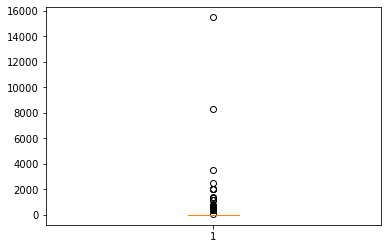

In [22]:
plt.boxplot(syd_house['MiscVal'])
Q1 = syd_house['MiscVal'].quantile(0.1)
Q3 = syd_house['MiscVal'].quantile(0.9)
IQR = Q3 - Q1
syd_house = syd_house[(syd_house['MiscVal'] >= Q1 - 1.5*IQR) & 
                      (syd_house['MiscVal'] <= Q3 + 1.5*IQR)]
syd_house.shape

(1402, 81)

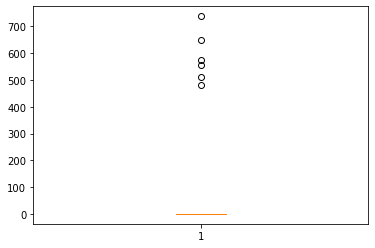

In [23]:
plt.boxplot(syd_house['PoolArea'])
Q1 = syd_house['PoolArea'].quantile(0.1)
Q3 = syd_house['PoolArea'].quantile(0.9)
IQR = Q3 - Q1
syd_house = syd_house[(syd_house['PoolArea'] >= Q1 - 1.5*IQR) & 
                      (syd_house['PoolArea'] <= Q3 + 1.5*IQR)]
syd_house.shape

(1396, 81)

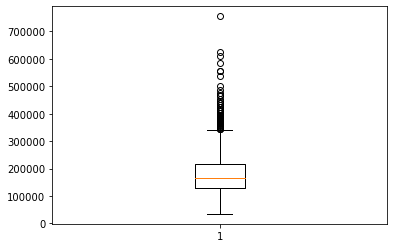

In [24]:
plt.boxplot(syd_house['SalePrice'])
Q1 = syd_house['SalePrice'].quantile(0.1)
Q3 = syd_house['SalePrice'].quantile(0.9)
IQR = Q3 - Q1
syd_house = syd_house[(syd_house['SalePrice'] >= Q1 - 1.5*IQR) & 
                      (syd_house['SalePrice'] <= Q3 + 1.5*IQR)]
syd_house.shape

(1377, 81)

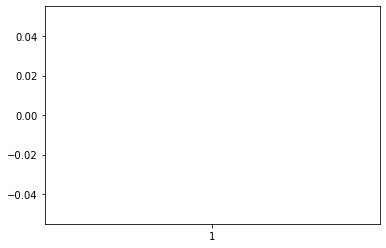

In [25]:
plt.boxplot(syd_house['MasVnrArea'])
Q1 = syd_house['MasVnrArea'].quantile(0.1)
Q3 = syd_house['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
syd_house = syd_house[(syd_house['MasVnrArea'] >= Q1 - 1.5*IQR) & 
                      (syd_house['MasVnrArea'] <= Q3 + 1.5*IQR)]
syd_house.shape

### Corelation between Variables

In [26]:
cor = syd_house_num.corr()
cor

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,1.000000,-0.010601,-0.033226,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,...,0.008273,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,-0.021917
LotFrontage,-0.010601,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,...,0.402797,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,-0.033226,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,...,0.263116,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,-0.050298,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,...,0.390857,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,-0.005024,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,...,0.208171,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,-0.005968,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,...,-0.009640,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,-0.007940,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,...,0.240257,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,-0.015415,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,...,0.454868,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.010496,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,...,0.566024,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.005590,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,...,0.687501,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334


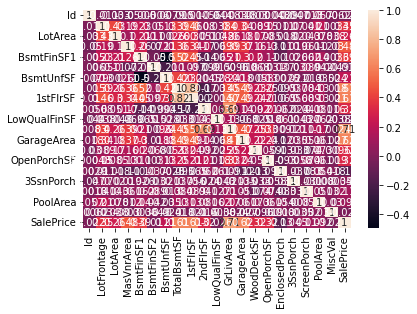

In [27]:
sns.heatmap(cor, annot=True)
plt.show()


### Data Cleaning

In [35]:
syd_house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      241
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [36]:
syd_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1377 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1377 non-null   int64  
 1   MSSubClass     1377 non-null   int64  
 2   MSZoning       1377 non-null   object 
 3   LotFrontage    1136 non-null   float64
 4   LotArea        1377 non-null   int64  
 5   Street         1377 non-null   object 
 6   Alley          83 non-null     object 
 7   LotShape       1377 non-null   object 
 8   LandContour    1377 non-null   object 
 9   Utilities      1377 non-null   object 
 10  LotConfig      1377 non-null   object 
 11  LandSlope      1377 non-null   object 
 12  Neighborhood   1377 non-null   object 
 13  Condition1     1377 non-null   object 
 14  Condition2     1377 non-null   object 
 15  BldgType       1377 non-null   object 
 16  HouseStyle     1377 non-null   object 
 17  OverallQual    1377 non-null   int64  
 18  OverallC

In [37]:
round(100*(syd_house.isnull().sum()/len(syd_house.index)), 2)

Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage      17.5
LotArea           0.0
                 ... 
MoSold            0.0
YrSold            0.0
SaleType          0.0
SaleCondition     0.0
SalePrice         0.0
Length: 81, dtype: float64

In [40]:
syd_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1377 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1377 non-null   int64  
 1   MSSubClass     1377 non-null   int64  
 2   MSZoning       1377 non-null   object 
 3   LotFrontage    1136 non-null   float64
 4   LotArea        1377 non-null   int64  
 5   Street         1377 non-null   object 
 6   Alley          83 non-null     object 
 7   LotShape       1377 non-null   object 
 8   LandContour    1377 non-null   object 
 9   Utilities      1377 non-null   object 
 10  LotConfig      1377 non-null   object 
 11  LandSlope      1377 non-null   object 
 12  Neighborhood   1377 non-null   object 
 13  Condition1     1377 non-null   object 
 14  Condition2     1377 non-null   object 
 15  BldgType       1377 non-null   object 
 16  HouseStyle     1377 non-null   object 
 17  OverallQual    1377 non-null   int64  
 18  OverallC

In [45]:
syd_house['MasVnrType'].fillna('None', inplace=True) 
syd_house['FireplaceQu'].fillna('No Fireplace', inplace=True)
syd_house['Alley'].fillna('No Alley', inplace=True)
syd_house['PoolQC'].fillna('No Pool', inplace=True)

In [46]:
syd_house['MasVnrArea'].fillna(0, inplace=True)
syd_house['LotFrontage'].fillna(0, inplace=True) 

In [48]:
syd_house= syd_house.drop('MiscFeature', axis=1)

In [44]:
syd_house['GarageType'].fillna('No Garage', inplace=True) 
syd_house['GarageFinish'].fillna('No Garage', inplace=True) 
syd_house['GarageQual'].fillna('No Garage', inplace=True) 
syd_house['GarageCond'].fillna('No Garage', inplace=True) 

In [51]:
syd_house.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1377 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1377 non-null   bool 
 1   MSSubClass     1377 non-null   bool 
 2   MSZoning       1377 non-null   bool 
 3   LotFrontage    1377 non-null   bool 
 4   LotArea        1377 non-null   bool 
 5   Street         1377 non-null   bool 
 6   Alley          1377 non-null   bool 
 7   LotShape       1377 non-null   bool 
 8   LandContour    1377 non-null   bool 
 9   Utilities      1377 non-null   bool 
 10  LotConfig      1377 non-null   bool 
 11  LandSlope      1377 non-null   bool 
 12  Neighborhood   1377 non-null   bool 
 13  Condition1     1377 non-null   bool 
 14  Condition2     1377 non-null   bool 
 15  BldgType       1377 non-null   bool 
 16  HouseStyle     1377 non-null   bool 
 17  OverallQual    1377 non-null   bool 
 18  OverallCond    1377 non-null   bool 
 19  YearBu

In [53]:
syd_house.shape

(1377, 80)

In [54]:
final =syd_house

### Listing Variables and Functions

In [56]:
varlist1 =  ['Street']

def binary_map(x):
    return x.map({'Pave': 1, "Grvl": 0})

final[varlist1] = final[varlist1].apply(binary_map)

In [57]:
varlist2 =  ['Utilities']

def binary_map(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})
final[varlist2] = final[varlist2].apply(binary_map)

In [58]:
varlist3 =  ['CentralAir']

def binary_map(x):
    return x.map({'Y': 1, "N": 0})

final[varlist3] = final[varlist3].apply(binary_map)

In [60]:
X = final.drop([ 'Id'], axis=1)

In [61]:
syd_house_categorical = X.select_dtypes(include=['object'])
syd_house_categorical.head()

,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,RL,No Alley,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,No Fireplace,Attchd,RFn,TA,TA,Y,No Pool,NaN,WD,Normal
1,RL,No Alley,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,TA,Attchd,RFn,TA,TA,Y,No Pool,NaN,WD,Normal
2,RL,No Alley,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,TA,Attchd,RFn,TA,TA,Y,No Pool,NaN,WD,Normal
3,RL,No Alley,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,Gd,Detchd,Unf,TA,TA,Y,No Pool,NaN,WD,Abnorml
4,RL,No Alley,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,TA,Attchd,RFn,TA,TA,Y,No Pool,NaN,WD,Normal


In [63]:
syd_house_dummies = pd.get_dummies(syd_house_categorical, drop_first=True)
syd_house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [64]:
final = final.drop(list(syd_house_categorical.columns), axis=1)

In [65]:
final = pd.concat([final, syd_house_dummies], axis=1)

In [66]:
final.shape

(1377, 241)

In [81]:
test = final.tail(1377)

In [82]:
test.shape

(1377, 241)

In [83]:
X = final.head(1377)
y = np.log(X.SalePrice)
X = X.drop("SalePrice",1)

In [84]:
test = test.fillna(test.interpolate())

In [85]:
X = X.fillna(X.interpolate())

In [86]:
test = test.drop("SalePrice",1)

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(test)

StandardScaler()

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [70]:
from sklearn.model_selection import GridSearchCV

### Ridge Regression 

In [110]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [111]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 20}
-0.08080601514715889


In [112]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006585,0.002308,0.002651,0.000838,0.0001,{'alpha': 0.0001},-0.115079,-0.095303,-0.089470,-0.099625,...,-0.098843,0.008734,28,-0.054819,-0.058612,-0.061003,-0.056111,-0.059324,-0.057974,0.002228
1,0.004599,0.000447,0.001807,0.000261,0.001,{'alpha': 0.001},-0.114860,-0.095267,-0.089400,-0.099603,...,-0.098767,0.008674,27,-0.054831,-0.058623,-0.061012,-0.056121,-0.059326,-0.057983,0.002226
2,0.003976,0.000221,0.001843,0.000474,0.01,{'alpha': 0.01},-0.113311,-0.094914,-0.088786,-0.099407,...,-0.098154,0.008295,26,-0.054997,-0.058711,-0.061092,-0.056209,-0.059359,-0.058073,0.002196
3,0.004049,0.000246,0.001964,0.000273,0.05,{'alpha': 0.05},-0.109392,-0.093553,-0.087127,-0.098645,...,-0.096343,0.007476,25,-0.055723,-0.058974,-0.061356,-0.056489,-0.059509,-0.058410,0.002055
4,0.004510,0.000410,0.002050,0.000354,0.1,{'alpha': 0.1},-0.106439,-0.092192,-0.085865,-0.097946,...,-0.094807,0.006961,24,-0.056405,-0.059237,-0.061582,-0.056757,-0.059704,-0.058737,0.001931
5,0.004302,0.000590,0.001893,0.000382,0.2,{'alpha': 0.2},-0.103378,-0.090149,-0.084337,-0.096917,...,-0.092828,0.006623,22,-0.057295,-0.059744,-0.061963,-0.057266,-0.060226,-0.059299,0.001806
6,0.004420,0.000390,0.002258,0.000590,0.3,{'alpha': 0.3},-0.101462,-0.088585,-0.083427,-0.096159,...,-0.091494,0.006450,21,-0.057934,-0.060206,-0.062291,-0.057683,-0.060664,-0.059755,0.001736
7,0.004016,0.000235,0.002418,0.001234,0.4,{'alpha': 0.4},-0.100076,-0.087416,-0.082770,-0.095578,...,-0.090529,0.006331,20,-0.058430,-0.060602,-0.062543,-0.058018,-0.061039,-0.060126,0.001686
8,0.003919,0.000321,0.001801,0.000314,0.5,{'alpha': 0.5},-0.098946,-0.086453,-0.082219,-0.095158,...,-0.089751,0.006255,19,-0.058827,-0.060932,-0.062775,-0.058298,-0.061359,-0.060438,0.001657
9,0.003950,0.000183,0.002174,0.000131,0.6,{'alpha': 0.6},-0.098111,-0.085623,-0.081765,-0.094803,...,-0.089118,0.006231,18,-0.059156,-0.061234,-0.062981,-0.058528,-0.061630,-0.060706,0.001641


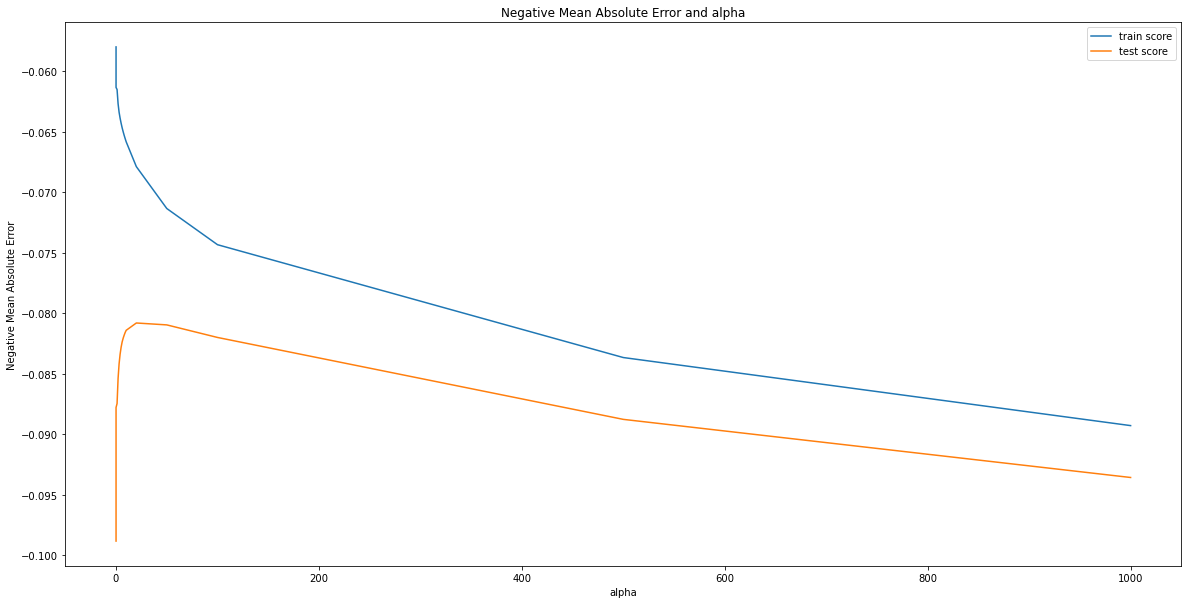

In [113]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(20,10))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()    

In [114]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 20}
-0.08080601514715889


### Lasso

In [97]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [98]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.071071,0.015557,0.002152,0.000471,0.0001,{'alpha': 0.0001},-0.100764,-0.081124,-0.079938,-0.093089,...,-0.087818,0.007944,2,-0.058940,-0.062240,-0.063563,-0.059205,-0.062405,-0.061271,0.001854
1,0.011068,0.001361,0.001699,0.000050,0.001,{'alpha': 0.001},-0.085400,-0.077856,-0.074715,-0.086057,...,-0.081329,0.004391,1,-0.069055,-0.072181,-0.073176,-0.070619,-0.071548,-0.071316,0.001404
2,0.005120,0.000224,0.001896,0.000393,0.01,{'alpha': 0.01},-0.084582,-0.091174,-0.087406,-0.098219,...,-0.091521,0.005142,3,-0.088291,-0.087819,-0.089454,-0.086110,-0.086743,-0.087684,0.001173
3,0.038214,0.008063,0.001547,0.000012,0.05,{'alpha': 0.05},-0.097017,-0.106954,-0.099248,-0.117266,...,-0.105291,0.007094,4,-0.102240,-0.102395,-0.103525,-0.100147,-0.101398,-0.101941,0.001124
4,0.019963,0.003777,0.001563,0.000038,0.1,{'alpha': 0.1},-0.102265,-0.112276,-0.105333,-0.123184,...,-0.110971,0.007199,5,-0.109641,-0.107205,-0.110305,-0.105506,-0.108295,-0.108190,0.001718
5,0.022735,0.004153,0.001665,0.000150,0.2,{'alpha': 0.2},-0.102063,-0.112708,-0.106092,-0.123057,...,-0.110984,0.007103,6,-0.110393,-0.107631,-0.110611,-0.105542,-0.109017,-0.108639,0.001882
6,0.022015,0.002845,0.001775,0.000316,0.3,{'alpha': 0.3},-0.102873,-0.113780,-0.106741,-0.123171,...,-0.111406,0.006921,7,-0.110929,-0.107927,-0.111072,-0.105924,-0.109632,-0.109097,0.001948
7,0.020306,0.002239,0.001619,0.000142,0.4,{'alpha': 0.4},-0.103941,-0.114999,-0.107590,-0.123415,...,-0.111999,0.006745,8,-0.111570,-0.108489,-0.111803,-0.106606,-0.110449,-0.109783,0.001974
8,0.018890,0.002222,0.001803,0.000491,0.5,{'alpha': 0.5},-0.105221,-0.116566,-0.108871,-0.123532,...,-0.112898,0.006457,9,-0.112659,-0.109452,-0.112685,-0.107452,-0.111647,-0.110779,0.002037
9,0.017249,0.003008,0.001554,0.000024,0.6,{'alpha': 0.6},-0.107000,-0.118333,-0.110655,-0.123802,...,-0.114202,0.006043,10,-0.114031,-0.110707,-0.113831,-0.108570,-0.113166,-0.112061,0.002110


In [99]:
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      


model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [101]:
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.072908,0.019993,0.001794,0.000145,0.0001,{'alpha': 0.0001},0.835547,0.904985,0.909670,0.853994,...,0.878157,0.028925,2,0.954090,0.948053,0.942869,0.951680,0.947223,0.948783,0.003860
1,0.009529,0.000751,0.001592,0.000026,0.001,{'alpha': 0.001},0.895289,0.911043,0.907160,0.882060,...,0.899679,0.010245,1,0.930049,0.922994,0.920781,0.928631,0.924833,0.925458,0.003449
2,0.005306,0.000413,0.001905,0.000654,0.01,{'alpha': 0.01},0.890744,0.882329,0.879196,0.847976,...,0.874075,0.014621,3,0.884194,0.884570,0.883005,0.891902,0.887838,0.886302,0.003226
3,0.044733,0.008737,0.002422,0.001138,0.05,{'alpha': 0.05},0.850384,0.840083,0.845159,0.804505,...,0.834667,0.016114,4,0.845856,0.842042,0.844463,0.852923,0.849642,0.846985,0.003857
4,0.021668,0.002857,0.001595,0.000033,0.1,{'alpha': 0.1},0.834129,0.826230,0.832281,0.790526,...,0.819631,0.016015,5,0.828839,0.829128,0.827436,0.838819,0.832907,0.831426,0.004117
5,0.019799,0.001891,0.001679,0.000200,0.2,{'alpha': 0.2},0.832789,0.823476,0.830386,0.792946,...,0.818852,0.014404,6,0.826441,0.827375,0.825784,0.837632,0.831129,0.829672,0.004389
6,0.021023,0.003634,0.001564,0.000009,0.3,{'alpha': 0.3},0.829820,0.820996,0.828004,0.794719,...,0.817514,0.012691,7,0.824383,0.825715,0.823800,0.835673,0.829345,0.827783,0.004391
7,0.022449,0.001447,0.001758,0.000278,0.4,{'alpha': 0.4},0.826312,0.817954,0.824889,0.795820,...,0.815465,0.011030,8,0.822184,0.823454,0.821171,0.832928,0.827086,0.825365,0.004278
8,0.019742,0.002025,0.001758,0.000359,0.5,{'alpha': 0.5},0.821941,0.814337,0.820843,0.796106,...,0.812589,0.009366,9,0.819357,0.820546,0.818445,0.830066,0.824180,0.822519,0.004247
9,0.016936,0.002610,0.001566,0.000007,0.6,{'alpha': 0.6},0.816709,0.810143,0.816214,0.796164,...,0.809075,0.007559,10,0.815903,0.816993,0.815114,0.826814,0.820628,0.819090,0.004299


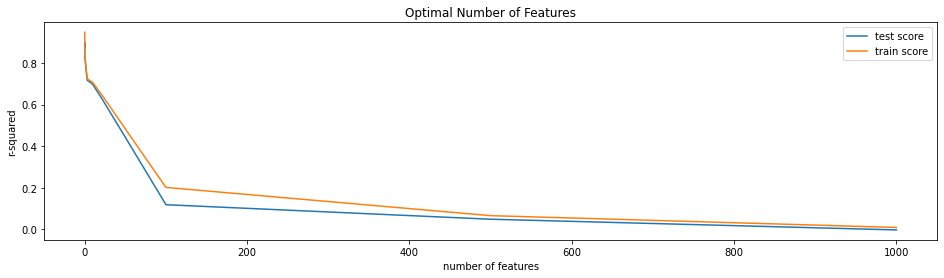

In [102]:
# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [103]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.08132925325889487


In [105]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [106]:
Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.0001)